# preprocessing
- find null values
- replace with feature mean
- find outliers (especially m2)
- enumarate categorical features
- drop title col
- drop id col
- convert all prices to try
- drop lat lon
- convert date values to be of the same race
- drop type (bcz all values are flat)
- drop currency
- remove outlier prices (25000 TL, 8500000TL)

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
FILENAME = "real_estate_data.csv"
df = pd.read_csv(FILENAME)
df

C:\Users\huday\AppData\Local\Temp\ipykernel_12168\3775919421.py:2: DtypeWarning: Columns (7,8,17,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(FILENAME)


,title,Id,price,currency,loc city,loc county,loc dist,lat,lon,date,...,tfloor,heat,bath,furn,status,resid,due,loan,saler,exc
0,SAHİBİNDEN-%10 İNDİRİM-225.000 TL,323589399,225000,Turkish Lira,İstanbul,Sancaktepe,Sarıgazi Mah.,41.0038377949543,29.21301931142807,28 Temmuz 2016,...,5,Combi,1,False,Tenant,False.1,0,True,Owner,True.1
1,İSTANBULUN MERKEZİ,323599659,360000,Turkish Lira,İstanbul,Üsküdar,Ünalan Mah.,41.00505149566664,29.06293362379074,28 Temmuz 2016,...,9,Combi,1,False,Empty,True,Unknown,True,Owner,False
2,Merkezde 4+1 Şömineli Ultra Lüks Sıfır İskanlı...,323536105,335000,Turkish Lira,İstanbul,Arnavutköy,Hastane Mah.,41.15349006974785,28.61914336681366,27 Temmuz 2016,...,5,Combi,1,False,Empty,True,Unknown,True,Owner,False
3,kelepir büyük dublex acil pazarlık yaparız boş...,323709392,235000,Turkish Lira,Antalya,Muratpaşa,Yenigün Mah.,36.902680915191745,30.72165828198194,28 Temmuz 2016,...,4,Floor Calorie,2,False,Tenant,False,25,True,Owner,True
4,ACİL SAHİBİNDEN MANİSA MURADİYE ANA CADDEDE DU...,323730617,229000,Turkish Lira,Manisa,Yunusemre,Muradiye,38.6388217455677,27.346086502075195,28 Temmuz 2016,...,5,Combi,2,False,Tenant,False,Unknown,True,Owner,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33267,satılık daire 2+1 .0 bahcelievler siyavuş paşa...,457328108,360000,Turkish Lira,İstanbul,Bahçelievler,Siyavuşpaşa Mah.,40.995306,28.851416,2017-09-03,...,5,Combi,1.0,False,Empty,False,10,True,Real Estate Office,False
33268,TALAS'IN EN GUZEL YERI YAMAC SITESI 6.BLOK,477529662,475000,Turkish Lira,Kayseri,Talas,Bahçelievler Mah.,38.685825,35.543849,2017-09-03,...,14,Central,2.0,False,Owner,True,Unknown,True,Owner,False
33269,7 EMLAK'TAN AKDERE MAHALLESİNDE 6+1 DUBLEKS SA...,406397908,375000,Turkish Lira,Ankara,Mamak,Kazım Orbay Mah.,39.913936,32.892213,2017-09-03,...,6,Combi,2.0,False,Owner,False,Unknown,False,Real Estate Office,False
33270,HOME Vizyon Şirinevler METROYA 6Dk Yürüme Yolu...,468679683,289000,Turkish Lira,İstanbul,Bahçelievler,Şirinevler Mah.,40.992231,28.843328,2017-09-03,...,5,Combi,1.0,False,Empty,False,Unknown,True,Real Estate Office,False


In [3]:
# Find rows where 'bath' column has null values
null_bath_rows = df[df['bath'].isnull()]
null_bath_rows.isnull().count()
df[df["rooms"] == "Unknown"]

,title,Id,price,currency,loc city,loc county,loc dist,lat,lon,date,...,tfloor,heat,bath,furn,status,resid,due,loan,saler,exc
2885,NEVİN AKGÜN ' DEN MUHTEŞEM VİLLA ............,73029877,3650000,US Dollar,İstanbul,Bakırköy,Basınköy Mah.,40.9795683799,28.7777684798,22 Temmuz 2017,...,3,Combi,2,False,Unknown,Unknown,Unknown,True,Real Estate Office,False
21037,KAT KARŞILIĞI ARSA VE KENTSEL DÖNÜŞÜM GREEN WO...,193123121,100000,Turkish Lira,İstanbul,Küçükçekmece,Halkalı Merkez Mah.,41.0359883953,28.7892436981,2017-08-24,...,5,NaN,NaN,False,Owner,False,Unknown,False,Real Estate Office,True


# Set rooms property

In [4]:
# Convert 'm2' column to numeric if it's not already
df['m2'] = pd.to_numeric(df['m2'], errors='coerce')

for i in df[df["rooms"] == "Unknown"].index:
    m2 = df.iloc[i]["m2"]
    mode = df[df['m2'] == m2]["rooms"].mode()
    if not mode.empty:  # Check if mode is not empty
        mode_value = mode.iloc[0]  # Take the first mode value
        df.at[i, "rooms"] = mode_value

# Set residence property

In [5]:
df['resid'] = (df['resid'] == 'unknown') & (df['price'] > 150000)

In [6]:
# Replace 'None' with np.nan if it's not already done
new_df = df.replace('None', np.NaN)

# Remove rows with any null values
df_cleaned = new_df.dropna()

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)

# Display the cleaned DataFrame

df_cleaned



,title,Id,price,currency,loc city,loc county,loc dist,lat,lon,date,...,tfloor,heat,bath,furn,status,resid,due,loan,saler,exc
0,SAHİBİNDEN-%10 İNDİRİM-225.000 TL,323589399,225000,Turkish Lira,İstanbul,Sancaktepe,Sarıgazi Mah.,41.0038377949543,29.21301931142807,28 Temmuz 2016,...,5,Combi,1,False,Tenant,False,0,True,Owner,True.1
1,İSTANBULUN MERKEZİ,323599659,360000,Turkish Lira,İstanbul,Üsküdar,Ünalan Mah.,41.00505149566664,29.06293362379074,28 Temmuz 2016,...,9,Combi,1,False,Empty,False,Unknown,True,Owner,False
2,Merkezde 4+1 Şömineli Ultra Lüks Sıfır İskanlı...,323536105,335000,Turkish Lira,İstanbul,Arnavutköy,Hastane Mah.,41.15349006974785,28.61914336681366,27 Temmuz 2016,...,5,Combi,1,False,Empty,False,Unknown,True,Owner,False
3,kelepir büyük dublex acil pazarlık yaparız boş...,323709392,235000,Turkish Lira,Antalya,Muratpaşa,Yenigün Mah.,36.902680915191745,30.72165828198194,28 Temmuz 2016,...,4,Floor Calorie,2,False,Tenant,False,25,True,Owner,True
4,ACİL SAHİBİNDEN MANİSA MURADİYE ANA CADDEDE DU...,323730617,229000,Turkish Lira,Manisa,Yunusemre,Muradiye,38.6388217455677,27.346086502075195,28 Temmuz 2016,...,5,Combi,2,False,Tenant,False,Unknown,True,Owner,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33267,satılık daire 2+1 .0 bahcelievler siyavuş paşa...,457328108,360000,Turkish Lira,İstanbul,Bahçelievler,Siyavuşpaşa Mah.,40.995306,28.851416,2017-09-03,...,5,Combi,1.0,False,Empty,False,10,True,Real Estate Office,False
33268,TALAS'IN EN GUZEL YERI YAMAC SITESI 6.BLOK,477529662,475000,Turkish Lira,Kayseri,Talas,Bahçelievler Mah.,38.685825,35.543849,2017-09-03,...,14,Central,2.0,False,Owner,False,Unknown,True,Owner,False
33269,7 EMLAK'TAN AKDERE MAHALLESİNDE 6+1 DUBLEKS SA...,406397908,375000,Turkish Lira,Ankara,Mamak,Kazım Orbay Mah.,39.913936,32.892213,2017-09-03,...,6,Combi,2.0,False,Owner,False,Unknown,False,Real Estate Office,False
33270,HOME Vizyon Şirinevler METROYA 6Dk Yürüme Yolu...,468679683,289000,Turkish Lira,İstanbul,Bahçelievler,Şirinevler Mah.,40.992231,28.843328,2017-09-03,...,5,Combi,1.0,False,Empty,False,Unknown,True,Real Estate Office,False


In [7]:

df = pd.read_csv('cleaned_data.csv')



In [8]:
missing_values_summary = df.isnull().sum()
missing_values_summary


title         0
Id            0
price         0
currency      0
loc city      0
loc county    0
loc dist      0
lat           0
lon           0
date          0
type          0
m2            0
rooms         0
age           0
floor         0
tfloor        0
heat          0
bath          0
furn          0
status        0
resid         0
due           0
loan          0
saler         0
exc           0
dtype: int64

# DROP FETURES

## Drop lat - lon - type - title - id - due and Status features from dataframe

In [9]:
if 'lat' in df.columns:
    df.drop('lat', axis=1, inplace=True)

if 'lon' in df.columns:
    df.drop('lon', axis=1, inplace=True)

if 'type' in df.columns:
    df.drop('type', axis=1, inplace=True)

if 'title' in df.columns:
    df.drop('title', axis=1, inplace=True)

if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

if 'due' in df.columns:
    df.drop('due', axis=1, inplace=True)

if 'Status' in df.columns:
    df.drop('Status', axis=1, inplace=True)

#drop resid column
if 'resid' in df.columns:
    df.drop('resid', axis=1, inplace=True)

df

,price,currency,loc city,loc county,loc dist,date,m2,rooms,age,floor,tfloor,heat,bath,furn,status,loan,saler,exc
0,225000,Turkish Lira,İstanbul,Sancaktepe,Sarıgazi Mah.,28 Temmuz 2016,85,2+1,5-10,High Entrance,5,Combi,1,False,Tenant,True,Owner,True.1
1,360000,Turkish Lira,İstanbul,Üsküdar,Ünalan Mah.,28 Temmuz 2016,87,2+1,0,Ground Floor,9,Combi,1,False,Empty,True,Owner,False
2,335000,Turkish Lira,İstanbul,Arnavutköy,Hastane Mah.,27 Temmuz 2016,160,4+1,0,4,5,Combi,1,False,Empty,True,Owner,False
3,235000,Turkish Lira,Antalya,Muratpaşa,Yenigün Mah.,28 Temmuz 2016,165,4+1,5-10,Rise 4,4,Floor Calorie,2,False,Tenant,True,Owner,True
4,229000,Turkish Lira,Manisa,Yunusemre,Muradiye,28 Temmuz 2016,208,5+1,0,Rise 4,5,Combi,2,False,Tenant,True,Owner,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32638,360000,Turkish Lira,İstanbul,Bahçelievler,Siyavuşpaşa Mah.,2017-09-03,80,2+1,0,2,5,Combi,1.0,False,Empty,True,Real Estate Office,False
32639,475000,Turkish Lira,Kayseri,Talas,Bahçelievler Mah.,2017-09-03,180,3+1,4,13,14,Central,2.0,False,Owner,True,Owner,False
32640,375000,Turkish Lira,Ankara,Mamak,Kazım Orbay Mah.,2017-09-03,280,6+1,5-10,6,6,Combi,2.0,False,Owner,False,Real Estate Office,False
32641,289000,Turkish Lira,İstanbul,Bahçelievler,Şirinevler Mah.,2017-09-03,88,2+1,0,1,5,Combi,1.0,False,Empty,True,Real Estate Office,False


## Change all currency with turkish lira equivalent and drop currency feature

In [10]:

if "currency" in df.columns:

    df.loc[df['currency'] == 'Euro', 'price'] *= 4
    df.loc[df['currency'] == 'US Dollar', 'price'] *= 3.5
    df.loc[df['currency'] == 'British Pound', 'price'] *= 4.5

    df.drop("currency", axis=1, inplace=True)
df["price"]




0        225000.0
1        360000.0
2        335000.0
3        235000.0
4        229000.0
           ...   
32638    360000.0
32639    475000.0
32640    375000.0
32641    289000.0
32642    320000.0
Name: price, Length: 32643, dtype: float64

## Outlier detection using confidence interval

In [11]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define a condition to identify outliers
outlier_condition = (df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))

# sadece turk lirasinda karsilasilan bir durum
# Display rows containing outliers
outliers = df[outlier_condition]
df.drop(outliers.index, inplace=True)
df


,price,loc city,loc county,loc dist,date,m2,rooms,age,floor,tfloor,heat,bath,furn,status,loan,saler,exc
0,225000.0,İstanbul,Sancaktepe,Sarıgazi Mah.,28 Temmuz 2016,85,2+1,5-10,High Entrance,5,Combi,1,False,Tenant,True,Owner,True.1
1,360000.0,İstanbul,Üsküdar,Ünalan Mah.,28 Temmuz 2016,87,2+1,0,Ground Floor,9,Combi,1,False,Empty,True,Owner,False
2,335000.0,İstanbul,Arnavutköy,Hastane Mah.,27 Temmuz 2016,160,4+1,0,4,5,Combi,1,False,Empty,True,Owner,False
3,235000.0,Antalya,Muratpaşa,Yenigün Mah.,28 Temmuz 2016,165,4+1,5-10,Rise 4,4,Floor Calorie,2,False,Tenant,True,Owner,True
4,229000.0,Manisa,Yunusemre,Muradiye,28 Temmuz 2016,208,5+1,0,Rise 4,5,Combi,2,False,Tenant,True,Owner,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32638,360000.0,İstanbul,Bahçelievler,Siyavuşpaşa Mah.,2017-09-03,80,2+1,0,2,5,Combi,1.0,False,Empty,True,Real Estate Office,False
32639,475000.0,Kayseri,Talas,Bahçelievler Mah.,2017-09-03,180,3+1,4,13,14,Central,2.0,False,Owner,True,Owner,False
32640,375000.0,Ankara,Mamak,Kazım Orbay Mah.,2017-09-03,280,6+1,5-10,6,6,Combi,2.0,False,Owner,False,Real Estate Office,False
32641,289000.0,İstanbul,Bahçelievler,Şirinevler Mah.,2017-09-03,88,2+1,0,1,5,Combi,1.0,False,Empty,True,Real Estate Office,False


## Date transformation

In [12]:
# df.loc()

# for tr, en in turkish_months.values():
#     df.loc[df['date'].str.contains(tr), 'price']

aylar = {"Ocak": "01", "Şubat": "02", "Mart": "03", "Nisan": "04", "Mayıs": "05", "Haziran": "06",
             "Temmuz": "07", "Ağustos": "08", "Eylül": "09", "Ekim": "10", "Kasım": "11", "Aralık": "12"}

def transform_date(date):
    match date:
        case str():
            result = '-'.join(date.split()[::-1])
            for ay, ay_kodu in aylar.items():
                result = result.replace(ay, ay_kodu)
            
            return result
        case _:
            return date

def transform_date_to_ms(date_str) -> int:
    from dateutil import parser

    match date_str:
        case str():
            return parser.parse(date_str, dayfirst=True).timestamp().__floor__()
        case _:
            return int(date_str)


# 'date' sütununu dönüştürün
df['date'] = df['date'].apply(transform_date)
df['date'] = df['date'].apply(transform_date_to_ms)
df['date']

0        1469653200
1        1469653200
2        1469566800
3        1469653200
4        1469653200
            ...    
32638    1489006800
32639    1489006800
32640    1489006800
32641    1489006800
32642    1489006800
Name: date, Length: 29607, dtype: int64

## Bath transformation

In [13]:
def transform_bath(bath):
    match bath:
        case str():
            if "+" in bath:
                return float(bath.replace("+", ""))
            else:
                return float(bath)
        case _:
            return bath

df["bath"] = df["bath"].apply(transform_bath)
df

,price,loc city,loc county,loc dist,date,m2,rooms,age,floor,tfloor,heat,bath,furn,status,loan,saler,exc
0,225000.0,İstanbul,Sancaktepe,Sarıgazi Mah.,1469653200,85,2+1,5-10,High Entrance,5,Combi,1.0,False,Tenant,True,Owner,True.1
1,360000.0,İstanbul,Üsküdar,Ünalan Mah.,1469653200,87,2+1,0,Ground Floor,9,Combi,1.0,False,Empty,True,Owner,False
2,335000.0,İstanbul,Arnavutköy,Hastane Mah.,1469566800,160,4+1,0,4,5,Combi,1.0,False,Empty,True,Owner,False
3,235000.0,Antalya,Muratpaşa,Yenigün Mah.,1469653200,165,4+1,5-10,Rise 4,4,Floor Calorie,2.0,False,Tenant,True,Owner,True
4,229000.0,Manisa,Yunusemre,Muradiye,1469653200,208,5+1,0,Rise 4,5,Combi,2.0,False,Tenant,True,Owner,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32638,360000.0,İstanbul,Bahçelievler,Siyavuşpaşa Mah.,1489006800,80,2+1,0,2,5,Combi,1.0,False,Empty,True,Real Estate Office,False
32639,475000.0,Kayseri,Talas,Bahçelievler Mah.,1489006800,180,3+1,4,13,14,Central,2.0,False,Owner,True,Owner,False
32640,375000.0,Ankara,Mamak,Kazım Orbay Mah.,1489006800,280,6+1,5-10,6,6,Combi,2.0,False,Owner,False,Real Estate Office,False
32641,289000.0,İstanbul,Bahçelievler,Şirinevler Mah.,1489006800,88,2+1,0,1,5,Combi,1.0,False,Empty,True,Real Estate Office,False


In [14]:
df["rooms"].value_counts()

rooms
3+1             12623
2+1             10623
1+1              2343
4+1              2331
5+1               455
4+2               359
3+2               274
5+2               145
6+1               121
1+0 (Studio)      119
2+2                82
6+2                52
7+1                24
4+3                20
7+2                12
5+3                 4
10+                 3
8+1                 3
8+2                 3
6+3                 3
4+4                 2
9+5                 1
7+3                 1
8+3                 1
9+1                 1
10+1                1
9+2                 1
Name: count, dtype: int64

In [15]:
df["rooms"].value_counts()

rooms
3+1             12623
2+1             10623
1+1              2343
4+1              2331
5+1               455
4+2               359
3+2               274
5+2               145
6+1               121
1+0 (Studio)      119
2+2                82
6+2                52
7+1                24
4+3                20
7+2                12
5+3                 4
10+                 3
8+1                 3
8+2                 3
6+3                 3
4+4                 2
9+5                 1
7+3                 1
8+3                 1
9+1                 1
10+1                1
9+2                 1
Name: count, dtype: int64

# Enumeration Process

In [16]:
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder

def enumerate_column(column: str, df: DataFrame):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

columns_to_enumerate = ["loc city", "loc county", "loc dist", "rooms", "age", "floor", "heat", ""]
df.dtypes


price         float64
loc city       object
loc county     object
loc dist       object
date            int64
m2              int64
rooms          object
age            object
floor          object
tfloor         object
heat           object
bath          float64
furn           object
status         object
loan           object
saler          object
exc            object
dtype: object

## Date converted from string to epoch ms

In [17]:
# enumerate_column("loc city", df)

c:\Users\huday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


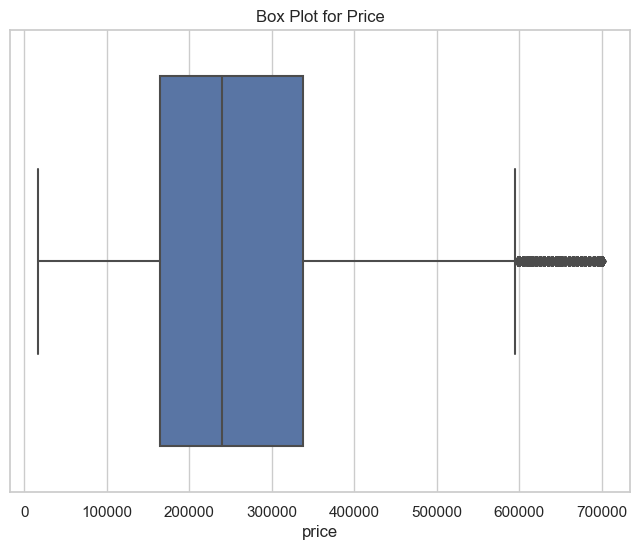

In [18]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Create a box plot for the 'price' column
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df, orient='v')
plt.title('Box Plot for Price')
plt.show()

In [19]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 13
Integer variables: 0
Float variables: 2


In [20]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))




<Axes: >

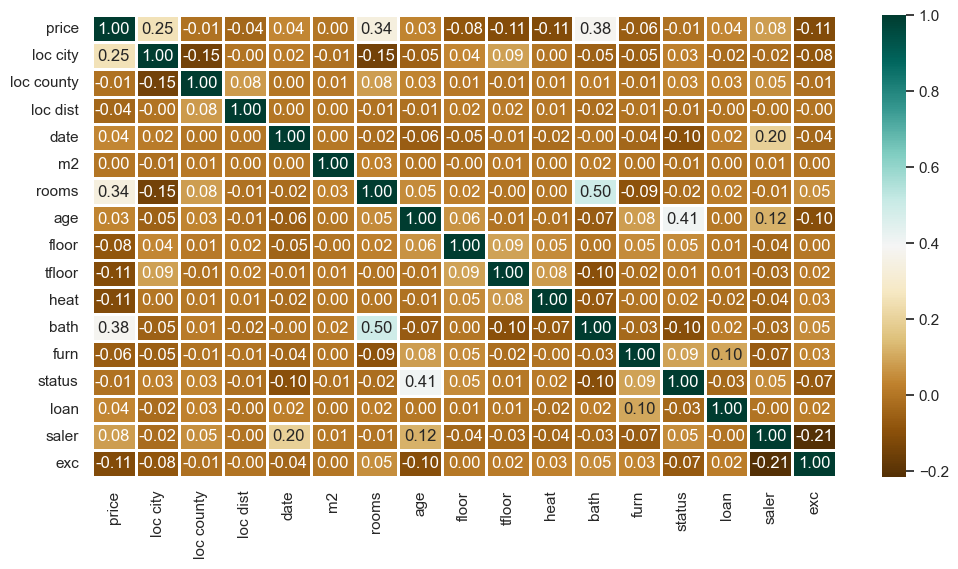

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)

In [22]:
# plt.figure(figsize=(18, 36))
# plt.title('Categorical Features: Distribution')
# plt.xticks(rotation=90)
# index = 1

# for col in object_cols:
# 	y = df[col].value_counts()
# 	plt.subplot(11, 4, index)
# 	plt.xticks(rotation=90)
# 	sns.barplot(x=list(y.index), y=y)
# 	index += 1

In [23]:
# Split

In [24]:
from sklearn.model_selection import train_test_split

# Separate target from predictors
y = df.price
X = df.drop('price', axis=1)

# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=42)
X_train.describe()


,loc city,loc county,loc dist,date,m2,rooms,age,floor,tfloor,heat,bath,furn,status,loan,saler,exc
count,23685.000000,23685.000000,23685.000000,2.368500e+04,23685.000000,23685.000000,23685.000000,23685.000000,23685.000000,23685.000000,23685.000000,23685.000000,23685.000000,23685.000000,23685.000000,23685.000000
mean,49.409289,234.993582,1380.809289,1.501810e+09,539.666793,5.269622,3.373528,20.183238,21.395525,2.078953,1.382647,0.084315,0.434199,0.898839,2.664345,0.213384
std,29.126616,120.941408,813.731539,6.410626e+06,8367.244533,2.249662,3.871132,11.271216,7.469955,1.788165,0.543306,0.339052,0.688553,0.366173,0.644293,0.409808
min,0.000000,0.000000,0.000000,1.452200e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,137.000000,619.000000,1.503176e+09,90.000000,4.000000,0.000000,11.000000,22.000000,2.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000
50%,60.000000,256.000000,1379.000000,1.503436e+09,120.000000,6.000000,2.000000,23.000000,24.000000,2.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000
75%,77.000000,314.000000,2150.000000,1.503608e+09,150.000000,6.000000,7.000000,29.000000,25.000000,2.000000,2.000000,0.000000,1.000000,1.000000,3.000000,0.000000
max,80.000000,452.000000,2738.000000,1.512680e+09,285000.000000,25.000000,10.000000,40.000000,29.000000,11.000000,6.000000,2.000000,2.000000,2.000000,3.000000,2.000000


In [25]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_test.drop(cols_with_missing, axis=1)

print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_test))


MAE (Drop columns with missing values):
54818.83224335006


In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

In [28]:
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))
print("Number of samples in X_test:", len(X_test))
print("Number of samples in y_valid:", len(y_test))


Number of samples in X_train: 23685
Number of samples in y_train: 23685
Number of samples in X_test: 5922
Number of samples in y_valid: 5922


In [29]:
from sklearn.ensemble import RandomForestClassifier

def RandomForest(X_train,y_train, X_test, y_test):
    clf = RandomForestClassifier()
    x_scaled=sc.fit_transform(X_train)
    clf.fit(x_scaled, y_train)
    X_test=sc.fit_transform(X_test)
    y_pred = clf.predict(X_test)
    #print("ConfusionMatrix:")
    #print(confusion_matrix(y_test, y_pred))
    print("accuracy: ",accuracy_score(y_test, y_pred))
    print("f1_score: ",f1_score(y_test, y_pred, zero_division=1))
    sns.heatmap((confusion_matrix(y_test, y_pred)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data'); 
    #return clf

In [30]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

train_accuracy = model.score(X_train, y_train)  # R-squared or another appropriate metric
print(f'Train Accuracy: {train_accuracy}')

test_accuracy = model.score(X_test, y_test)  # R-squared or another appropriate metric
print(f'Test Accuracy: {test_accuracy}')


Mean Squared Error: 12921692081.480154
Train Accuracy: 0.310883537064526
Test Accuracy: 0.3071794594911761


this can only mean one thing: *Linear regression is unefficient for this dataset*
RandomForest(X_train,y_train, X_test,  y_test)


In [31]:
# decision tree regression

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create and train the decision tree regression model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

train_accuracy = tree.score(X_train, y_train)  # R-squared or another appropriate metric
print(f'Train Accuracy: {train_accuracy}')

test_accuracy = tree.score(X_test, y_test)  # R-squared or another appropriate metric
print(f'Test Accuracy: {test_accuracy}')
# # five element from df
# X_train.head()

Mean Squared Error: 11995088099.721786
Train Accuracy: 0.9997785927824254
Test Accuracy: 0.35686105439619276


## Tree with Grid search

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Example values, you can customize these
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree regressor
tree = DecisionTreeRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Create a new decision tree regressor with the best hyperparameters
best_tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=10)


# Train the model on the entire training set
best_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_tree.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

train_accuracy = best_tree.score(X_train, y_train)  # R-squared or another appropriate metric
print(f'Train Accuracy: {train_accuracy}')

test_accuracy = best_tree.score(X_test, y_test)  # R-squared or another appropriate metric
print(f'Test Accuracy: {test_accuracy}')


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error: 8921501934.863548
Train Accuracy: 0.6434652658315343
Test Accuracy: 0.5216570899780595


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame containing the dataset
# Replace 'your_target_column' with the actual name of your target column

# Extract features (X) and target variable (y)
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but often recommended for RandomForest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 6102318444.13107
Root Mean Squared Error: 78117.3376666862


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Assuming your dataset is stored in a DataFrame called 'df'
# Make sure to preprocess your data and handle any missing values before proceeding

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
df['loc city'] = label_encoder.fit_transform(df['loc city'])
df['loc county'] = label_encoder.fit_transform(df['loc county'])
df['loc dist'] = label_encoder.fit_transform(df['loc dist'])
df['heat'] = label_encoder.fit_transform(df['heat'])
df['bath'] = label_encoder.fit_transform(df['bath'])
df['furn'] = label_encoder.fit_transform(df['furn'])
df['status'] = label_encoder.fit_transform(df['status'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['saler'] = label_encoder.fit_transform(df['saler'])
df['exc'] = label_encoder.fit_transform(df['exc'])

# Select features (independent variables) and target variable (dependent variable)
X = df.drop(['price'], axis=1)  # Assuming 'price' is the target variable
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the validation set

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on training set
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Training MSE: {mse_train}')

# Evaluate the model on validation set
# Evaluate the model on test set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {mse_test}')  
# Now, you can use the trained model to make predictions on new data
# For example, you can use model.predict(new_data) where new_data is a DataFrame with the same columns as X_train


Training MSE: 843025589.5294673
Test MSE: 6098384402.482034


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
# Train the model
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate regression metrics for training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate regression metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
train_accuracy = model.score(X_train, y_train) 
# Print the results
print("Metrics for Training Set:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"R-squared (R2): {r2_train}")

print("\nMetrics for Test Set:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R-squared (R2): {r2_test}")
print(f"Accuracy: {train_accuracy}")

Metrics for Training Set:
Mean Squared Error (MSE): 843025589.5294673
Root Mean Squared Error (RMSE): 29034.902953677447
Mean Absolute Error (MAE): 20240.86479247799
R-squared (R2): 0.9542481652073309

Metrics for Test Set:
Mean Squared Error (MSE): 6098384402.482034
Root Mean Squared Error (RMSE): 78092.15327087628
Mean Absolute Error (MAE): 54676.94859807121
R-squared (R2): 0.6730237842446554
Accuracy: 0.9542481652073309


In [35]:
test_accuracy = model.score(X_test, y_test) 
print(f"Accuracy: {test_accuracy}")

Accuracy: 0.6730237842446554


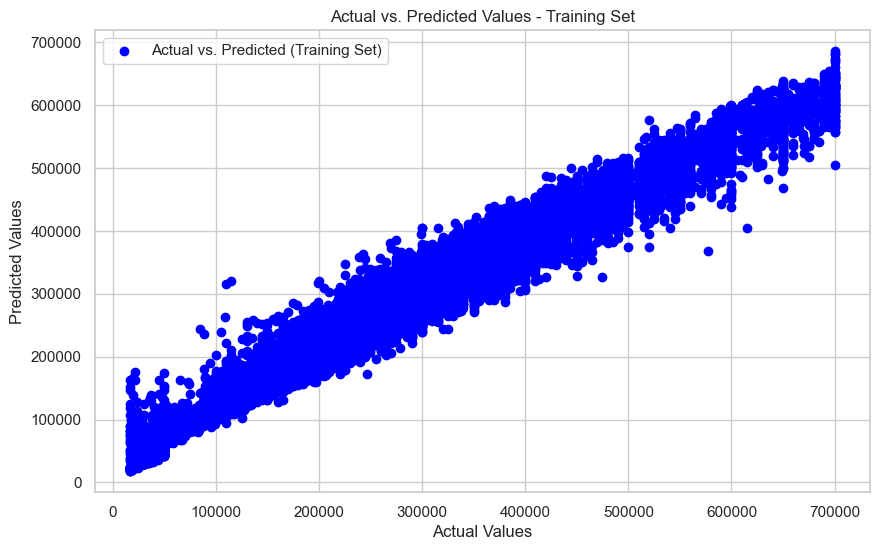

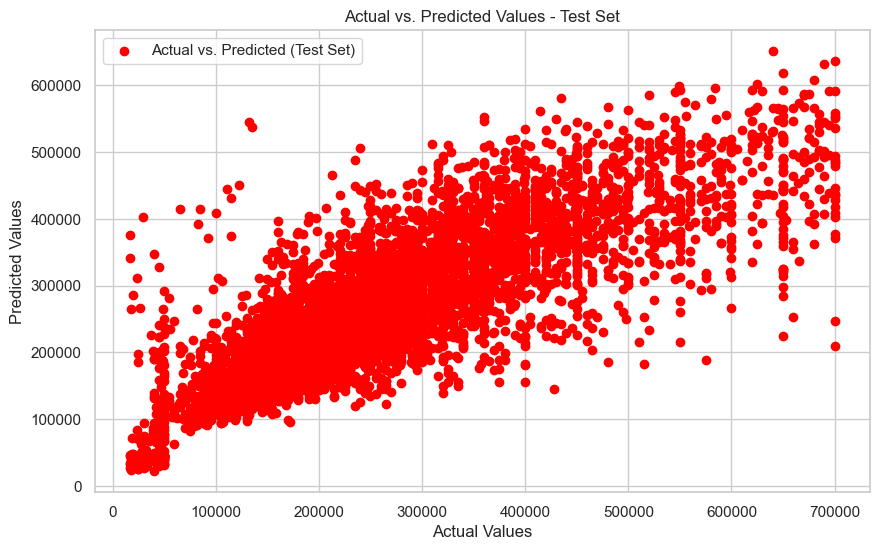

In [36]:
# Scatter plot for Training Set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs. Predicted (Training Set)')
plt.title('Actual vs. Predicted Values - Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Scatter plot for Test Set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='red', label='Actual vs. Predicted (Test Set)')
plt.title('Actual vs. Predicted Values - Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()